In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('fhs_train.csv')
df = df.drop('Unnamed: 0', axis=1)
df_test = pd.read_csv('fhs_test.csv')
df_test = df_test.drop('Unnamed: 0', axis=1)

df.head()



,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


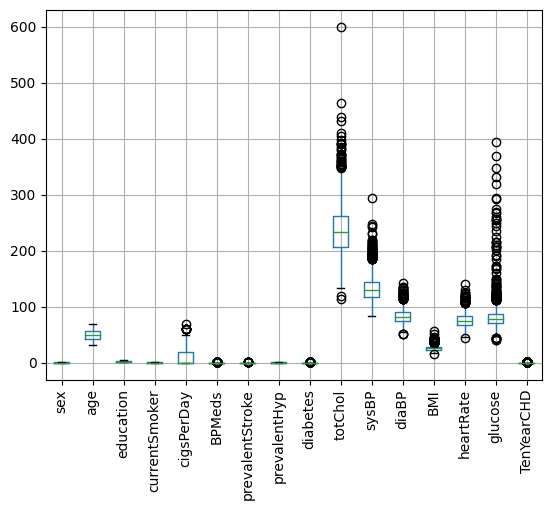

In [52]:
# Handle NAs by dropping:
df = df.dropna()
df_test = df_test.dropna()


# Outliers?
df.boxplot(rot=90)
plt.show()


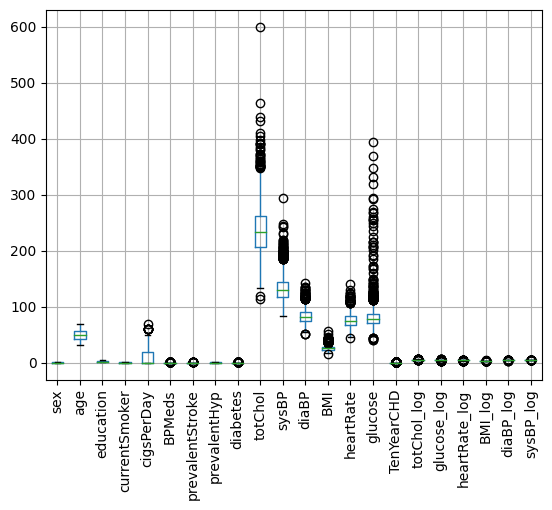

In [53]:

# Take logs:
df['totChol_log'] = np.log(df['totChol'])
df['glucose_log'] = np.log(df['glucose'])
df['heartRate_log'] = np.log(df['heartRate'])
df['BMI_log'] = np.log(df['BMI'])
df['diaBP_log'] = np.log(df['diaBP'])
df['sysBP_log'] = np.log(df['sysBP'])

df_test['totChol_log'] = np.log(df_test['totChol'])
df_test['glucose_log'] = np.log(df_test['glucose'])
df_test['heartRate_log'] = np.log(df_test['heartRate'])
df_test['BMI_log'] = np.log(df_test['BMI'])
df_test['diaBP_log'] = np.log(df_test['diaBP'])
df_test['sysBP_log'] = np.log(df_test['sysBP'])


df.boxplot(rot=90)
plt.show()



In [54]:
## Random Forest Regressor:

from sklearn.ensemble import RandomForestRegressor

# Preprocess data for random forest:
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']
X_test = df_test.drop('TenYearCHD',axis=1)
y_test = df_test['TenYearCHD']

# Fit model:
model = RandomForestRegressor(n_estimators=500) # Build a random forest model
rf = model.fit(X,y) # Fit the rf model
y_hat = rf.predict(X_test) # Model predictions

SSE = np.sum( (y_test - y_hat)**2 )
TSS = np.sum( (y_test - np.mean(y) )**2 )
rsq = 1 - SSE/TSS
print(rsq)




0.04920232744568054


In [55]:
## Linear Regression:

from sklearn.linear_model import LinearRegression

# Preprocess data for random forest:
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']
X_test = df_test.drop('TenYearCHD',axis=1)
y_test = df_test['TenYearCHD']

# Fit model:
model = LinearRegression() # Build a random forest model
lm = model.fit(X,y) # Fit the rf model
y_hat = lm.predict(X_test) # Model predictions

SSE = np.sum( (y_test - y_hat)**2 )
TSS = np.sum( (y_test - np.mean(y) )**2 )
rsq = 1 - SSE/TSS
print(rsq)

0.10222071439477665


In [56]:
## Decision Tree:
from sklearn.tree import DecisionTreeRegressor

# Preprocess data for random forest:
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']
X_test = df_test.drop('TenYearCHD',axis=1)
y_test = df_test['TenYearCHD']

# Fit model:
model = DecisionTreeRegressor() 
tree = model.fit(X,y) 
y_hat = tree.predict(X_test) 

SSE = np.sum( (y_test - y_hat)**2 )
TSS = np.sum( (y_test - np.mean(y) )**2 )
rsq = 1 - SSE/TSS
print(rsq)

-0.829042234363687


0.06161407743229941


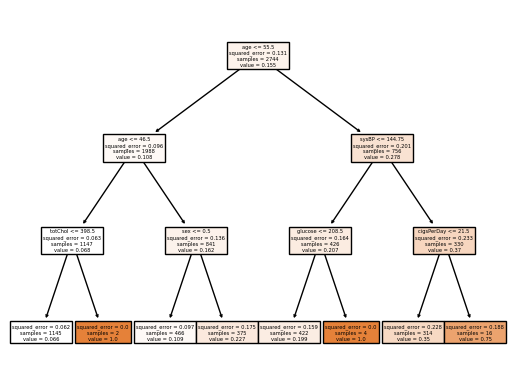

In [57]:
## Decision Tree, constrained depth: 

from sklearn.tree import DecisionTreeRegressor
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']
X_test = df_test.drop('TenYearCHD',axis=1)
y_test = df_test['TenYearCHD']
# Fit model:
model = DecisionTreeRegressor(max_depth=3) 
tree = model.fit(X,y)
y_hat = tree.predict(X_test) # Model predictions
SSE = np.sum( (y_test - y_hat)**2 )
TSS = np.sum( (y_test - np.mean(y) )**2 )
rsq = 1 - SSE/TSS
print(rsq)
plot_tree(tree,filled=True,feature_names=tree.feature_names_in_ ) 
plt.show()